In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random





### K-Means implementation description


This is a simple implementation of the K-Means clustering algorithm in Python. The K-Means algorithm is an unsupervised learning algorithm that groups data points into k clusters based on their features.
Class K_Means
__init__(self, data, k=2)

    Initializes the K-Means clustering object.
    Parameters:
        data: A numpy array (matrix) representing the dataset.
        k: The number of clusters. Default is 2.

_sqr_distance(array1, array2)

    Computes the squared Euclidean distance between two arrays.
    Parameters:
        array1: A numpy array representing a data instance.
        array2: A numpy array representing another data instance.
    Returns: A float representing the squared Euclidean distance between the two arrays.

_match_data_to_centroid(self, ind)

    Finds the index of the closest centroid for a given data instance.
    Parameters:
        ind: An integer representing the index of the data instance in the dataset.
    Returns: An integer representing the index of the closest centroid.

_assign_centroids(self)

    Assigns each data instance to the closest centroid.

get_avg_point(self, centroid_num)

    Computes the average point for a cluster.
    Parameters:
        centroid_num: An integer representing the cluster number.
    Returns: A numpy array representing the average point of the cluster.

_move_centroids(self)

    Updates the centroids by computing the average point of each cluster.

compute_cost(self)

    Computes the average squared distance between data instances and their assigned centroids.
    Returns: A float representing the average squared distance.

fit(self, epochs=5)

    Fits the K-Means clustering algorithm to the dataset and updates centroids for a given number of epochs.
    Parameters:
        epochs: The number of iterations to update the centroids. Default is 5.

In [13]:
class K_Means(): 
    
    def __init__(self, data, k=2):
        
        #data -  numpy matrix
        
        
        self.data = data
        self.m = self.data.shape[0]
        
        
        #format { ind of row of data : cluster_number}
        
        
        
        #set default param
        self.K = k
        
        
        self.centroids = random.sample(list(self.data), self.K)
        
        self.cluster_assignment = [None for i in range(self.m)]
        
        
    @staticmethod
    def _sqr_distance(array1, array2):
        
        
        #array1 and array2 - line of features representing an instance of data
        #assume numerical data (categorical must be encoded)
        #euclidean distance
        
        d = np.sum((array1 - array2) ** 2)
        
        
        return d 
    
    
    
    
    def _match_data_to_centroid(self, ind): #returns index of centroid
        
        sq_d = float("INF")
        closest_c = 0
        
        
        
        for k in range (self.K):
            
            new_d = self._sqr_distance(self.centroids[k], self.data[ind])
            
            if new_d < sq_d:
                
                sq_d = new_d
                closest_c = k
                
        
        return closest_c
    
    
    def _assign_centroids(self):
        
        
        for i in range(self.m):
            
            self.cluster_assignment[i] = self._match_data_to_centroid(i)
            

    def get_avg_point(self, centroid_num):
        
        #collect all data with this match
        
        centroids_data = [ ]
        
        count = 0
        
        
        for i in range(self.m):
            
            
            if self.cluster_assignment[i] == centroid_num:
                
                
                centroids_data.append(self.data[i])
                
                count += 1
                
        
        centroids_data = np.array(centroids_data)
        
        
        return (np.sum(centroids_data, axis=0) / count)  #return avg
    
    
    
    def _move_centroids(self):
        
        for k in range(self.K):
            
            new_centroid_position = self.get_avg_point(k)
            
            self.centroids[k] = new_centroid_position
            
            
    def compute_cost(self):
        
        avg_squared_dist = 0
        
        for i in range(self.m):
            
            instance = self.data[i]
            
            nearst_cluster_ind = self.cluster_assignment[i]
            nearst_cluster = self.centroids[nearst_cluster_ind]
            
            
            distance = self._sqr_distance(nearst_cluster, instance)
            
            avg_squared_dist += distance
            
        
        return avg_squared_dist / self.m
        
        
    
    def fit(self, epochs=5): # return ndarray of cluster assignments
        
        
        for i in range(epochs):
            
            
            self._assign_centroids()
            self._move_centroids()
            print("Cost = ", self.compute_cost())


### Testing code with artificial simple dataset


In [28]:
import numpy as np
import random

# Cluster 1
mean1 = [0, 0]
cov1 = [[1, 0], [0, 1]]
cluster1 = np.random.multivariate_normal(mean1, cov1, size=30)

# Cluster 2
mean2 = [6, 6]
cov2 = [[1, 0], [0, 1]]
cluster2 = np.random.multivariate_normal(mean2, cov2, size=20)

# Cluster 3
mean3 = [0, 6]
cov3 = [[1, 0], [0, 1]]
cluster3 = np.random.multivariate_normal(mean3, cov3, size=23)

# Combine clusters
data = np.concatenate((cluster1, cluster2, cluster3), axis=0)

# Shuffle data points
np.random.shuffle(data)


In [29]:
kmeans = K_Means(data, k=3)

kmeans.fit(5)

Cost =  6.0005815746399085

Cost =  2.7056351289109823

Cost =  1.8267953713746294

Cost =  1.7772665270098216

Cost =  1.7772665270098216


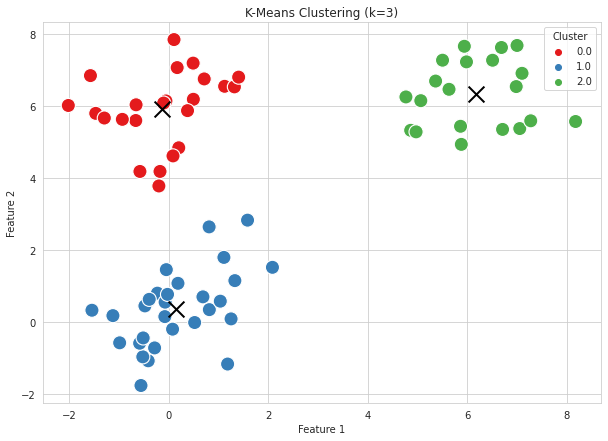

In [41]:

#VISUALIZING THE RESULT

plt.figure(figsize=(10, 7))


sns.set_style("whitegrid")
sns.set_palette("husl")

# Prepare the data for plotting
plot_data = np.column_stack((data, kmeans.cluster_assignment))
plot_data = pd.DataFrame(plot_data, columns=['Feature 1', 'Feature 2', 'Cluster'])

# Create a scatter plot of the clustered data
sns.scatterplot(x='Feature 1', y='Feature 2', hue='Cluster', data=plot_data, palette='Set1',s=200 )

# Plot the centroids
for k in range(kmeans.K):
    plt.scatter(kmeans.centroids[k][0], kmeans.centroids[k][1], color='black', marker='x', s=250, linewidths=2)

plt.title('K-Means Clustering (k=3)')
plt.show()
